In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_31356\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[1266]

Unnamed: 0                         1266.000000
EPIC ID                       210421801.000000
Teff                               3136.940000
logg                                  4.937600
Flare #                              12.000000
Observation time                     70.857511
Average flare duration                0.093646
Longest flare duration                0.122594
Shortest flare duration               0.081726
Average percentage increase          23.865156
Highest percentage increase         129.777789
Lowest percentage increase            6.811500
Name: 1266, dtype: float64

In [4]:
flc = from_mast("210421801", mode="LC", mission="K2")

5% (181/3463) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (181/3463) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

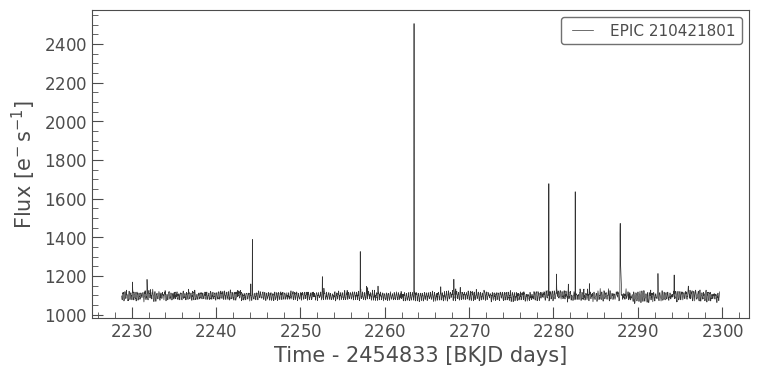

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

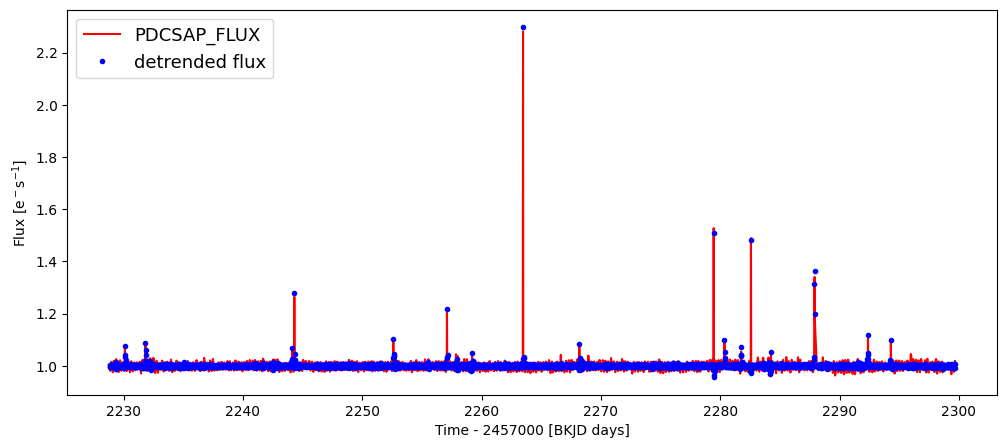

In [15]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
#plt.xlim(2263, 2264)
#plt.ylim(.95,1.25)
plt.legend(loc=2,fontsize=13);

In [9]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,61,65,103808,103812,2230.108125,2230.189854,302.7186529832503,11.046148669037304,0.07505357265472412,0.081730,3272.000000
1,139,145,103890,103896,2231.783580,2231.906174,427.8717872867272,12.504588004000373,0.08716654777526855,0.122594,3272.000000
2,719,723,104491,104495,2244.063329,2244.145058,221.98308969022935,10.02689243590379,0.0681149959564209,0.081728,3272.000000
3,730,734,104503,104507,2244.308514,2244.390242,653.735908332925,7.97328489151782,0.27905428409576416,0.081728,3272.000000
4,1114,1119,104908,104913,2252.583452,2252.685611,448.77839784862977,12.048648537286812,0.10361027717590332,0.102159,3272.000000
5,1323,1327,105129,105133,2257.098884,2257.180611,568.2032490483829,8.74513965744099,0.21712946891784668,0.081727,3272.000000
6,1625,1630,105440,105446,2263.453154,2263.575744,2529.9481347410474,7.039895283792284,1.2977778911590576,0.122590,3272.000000
7,1849,1853,105672,105676,2268.193301,2268.275027,274.03523104761507,10.321961853028496,0.0819861888885498,0.081727,3272.000000
8,2419,2423,106267,106271,2280.350104,2280.431830,372.0129107669084,10.753488170469792,0.10050952434539795,0.081726,3272.000000
9,2480,2485,106334,106339,2281.719019,2281.821177,369.3150774133433,12.810980321691195,0.07155585289001465,0.102158,3272.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 10 candidate(s) in the (0,2502) gap.
Found 0 candidate(s) in the (2502,2737) gap.
Found 1 candidate(s) in the (2737,2753) gap.
Found 0 candidate(s) in the (2753,2804) gap.
Found 1 candidate(s) in the (2804,3272) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
